In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import fisher_exact

In [83]:
import matplotlib.pyplot as plt

In [114]:
from scipy.stats import ttest_ind

In [3]:
dffullunc = pd.read_csv("../commed/responsefin1.csv")
dffullunc.drop(columns='Timestamp', inplace=True)
dffullunc

,1. เพศ,2. อายุ,3. วอร์ดที่อยู่ปัจจุบัน,4. ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดระหว่างอยู่ที่วอร์ด,5. ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดเมื่ออยู่ที่หอพัก,6.ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดเมื่ออยู่นอกโรงพยาบาล,7.หน้ากากอนามัยที่โรงพยาบาลจัดให้เพียงพอหรือไม่ (โรงพยาบาลแจก 30 ชิ้นต่อเดือน),8. จากข้อ 7 ถ้าไม่เพียงพอ ท่านต้องการหน้ากากอนามัยกี่ชิ้นต่อเดือน (ตอบเป็นจำนวนชิ้นที่ต้องการต่อเดือน),9. ท่านใส่หน้ากากอนามัยเมื่ออยู่ในเขตที่อยู่อาศัย (บ้านหรือหอพัก) กับคนในครอบครัวหรือเพื่อนหรือไม่,10. ท่านทิ้งหน้ากากอนามัยที่ใช้แล้วเวลาใด,...,ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [จับหน้ากากเฉพาะตรงเชือกที่ใช้คล้องหู],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [เอาเชือกคล้องหู แล้วใช้มือแนบหน้ากากกับใบหน้าให้สนิท พร้อมทั้งคลุมทั้งจมูก ปาก และคาง],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมืออีกครั้งหลังใส่หน้ากากอนามัย],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่มีรอยฉีกขาดหรือเปียกชื้น],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยปิดเพียงแค่ปากหรือจมูก],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่สายรัดหลวม ไม่กระชับ],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [จับหน้ากากอนามัยด้านที่หันออกจากใบหน้า],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [เลื่อนหน้ากากอนามัยลงเพื่อพูด],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [วางหน้ากากอนามัยที่ใช้แล้วในบริเวณที่ผู้อื่นอาจสัมผัสโดน],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใช้หน้ากากอนามัยซ้ำ]
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


# Part 1

In [6]:
df_part1 = dffullunc.iloc[:,:12]
colname = []
for i in range(1,13):
    colname.append('q'+str(i))
df_part1.columns = colname
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,พับด้านสีเข้มออกด้านนอก
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ


In [21]:
df_part1.replace('ถังขยะทั่วไปไม่มีฝาปิด','wrong',inplace=True)
df_part1.replace('ถังขยะทั่วไปมีฝาปิด','right',inplace=True)
df_part1.replace('ถังขยะติดเชื้อ','right',inplace=True)
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,ไม่พับ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,พับด้านสีเข้มออกด้านนอก
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ


In [23]:
df_part1.replace('ไม่พับ','wrong',inplace=True)
df_part1.replace('พับด้านสีเข้มเข้าด้านใน','wrong',inplace=True)
df_part1.replace('พับด้านสีเข้มออกด้านนอก','right',inplace=True)
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,wrong
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,right
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong


In [7]:
def fisherex(x,y):
    ct = pd.crosstab(x,y)
    odds, p = fisher_exact(ct)
    print (ct)
    print ('p-value = ' + str(p))

# Start here

In [8]:
# 1 sex vs maskatward
fisherex(df_part1.q1,df_part1.q4)

q4    หน้ากาก FFP1  หน้ากากอนามัยทางการแพทย์
q1                                          
ชาย              1                        49
หญิง             0                        52
p-value = 0.4901960784313725


In [12]:
# 2 sex vs maskatdorm
ct2 = pd.crosstab(df_part1.q1,df_part1.q5)
print (ct2)
print ('p-value = 0.4864')
#calc form Rstudio

q5    หน้ากาก FFP1  หน้ากากผ้า  หน้ากากฟองน้ำ  หน้ากากอนามัยทางการแพทย์
q1                                                                     
ชาย              1           1              1                        47
หญิง             0           3              0                        49
p-value = 0.4864


In [14]:
# 3 sex vs maskoutside
ct3 = pd.crosstab(df_part1.q1,df_part1.q6)
print (ct3)
print ('p-value = 0.8912')
#calc form Rstudio

q6    หน้ากากกระดาษ  หน้ากากผ้า  หน้ากากฟองน้ำ  หน้ากากอนามัยทางการแพทย์
q1                                                                      
ชาย               0           3              2                        45
หญิง              1           5              2                        44
p-value = 0.8912


In [16]:
# 4 sex vs maskwithfam
fisherex(df_part1.q1,df_part1.q9)

q9    ใส่  ไม่ใส่
q1               
ชาย     7      43
หญิง    0      52
p-value = 0.0054088186259499405


In [19]:
# 5 sex vs discardwhen
ct5 = pd.crosstab(df_part1.q1,df_part1.q10)
ct5

q10,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว
q1,,
ชาย,12,38
หญิง,13,39


In [20]:
# 5 cont'
_, p5 = fisher_exact(ct5)
p5

1.0

In [22]:
# 6 sex vs bin
fisherex(df_part1.q1,df_part1.q11)

q11   right  wrong
q1                
ชาย      21     29
หญิง     30     22
p-value = 0.16530586112156564


In [24]:
# 7 sex vs bin
fisherex(df_part1.q1,df_part1.q12)

q12   right  wrong
q1                
ชาย      17     33
หญิง     14     38
p-value = 0.5201323006806209


In [29]:
df_part1.groupby('q3').count()

,q1,q2,q4,q5,q6,q7,q8,q9,q10,q11,q12
q3,,,,,,,,,,,
Anesthesiology,6,6,6,6,6,6,0,6,6,6,6
Community medicine,26,26,26,26,26,26,4,26,26,26,26
Medicine,34,34,34,34,34,34,0,34,34,34,34
Ophthalmology,6,6,6,6,6,6,0,6,6,6,6
Orthopedic,10,10,10,10,10,10,0,10,10,10,10
Otolaryngology,5,5,5,5,5,5,0,5,5,5,5
Psychology,10,10,10,10,10,10,1,10,10,10,10
Rehabilitation,5,5,5,5,5,5,0,5,5,5,5


In [52]:
ct7 = pd.crosstab(df_part1.q3,df_part1.q4)
ct7

q4,หน้ากาก FFP1,หน้ากากอนามัยทางการแพทย์
q3,,
Anesthesiology,0,6
Community medicine,0,26
Medicine,1,33
Ophthalmology,0,6
Orthopedic,0,10
Otolaryngology,0,5
Psychology,0,10
Rehabilitation,0,5


In [54]:
ct8 = pd.crosstab(df_part1.q3,df_part1.q6)
ct8

q6,หน้ากากกระดาษ,หน้ากากผ้า,หน้ากากฟองน้ำ,หน้ากากอนามัยทางการแพทย์
q3,,,,
Anesthesiology,0,0,0,6
Community medicine,0,2,0,24
Medicine,1,1,2,30
Ophthalmology,0,1,0,5
Orthopedic,0,3,1,6
Otolaryngology,0,0,1,4
Psychology,0,1,0,9
Rehabilitation,0,0,0,5


# Part 2 Checklist

In [43]:
df_part2 = dffullunc.iloc[:,12:]
df_part2

,ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมือก่อนใส่หน้ากากอนามัย],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ตรวจสอบหน้ากากอนามัยว่ามีรูทะลุหรือรอยฉีกขาดก่อนใส่],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยโดยเอาขอบที่มีลวดไว้ด้านบน],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยโดยนำด้านสีเข้มออกด้านนอก],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [กดด้านขอบที่มีลวดให้แนบพอดีกับจมูก],"ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยให้ปกปิดจมูก, ปากและคาง]",ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ถอดหน้ากากโดยการจับสายรัดหลังหู],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [หลีกเลี่ยงไม่ให้หน้ากากสัมผัสใกล้ชิดตัวหลังถอด],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ทิ้งหน้ากากอนามัยทันทีหลังถอดลงในถังขยะติดเชื้อหรือถังขยะที่มีฝาปิด],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมือให้สะอาดหลังถอด],...,ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [จับหน้ากากเฉพาะตรงเชือกที่ใช้คล้องหู],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [เอาเชือกคล้องหู แล้วใช้มือแนบหน้ากากกับใบหน้าให้สนิท พร้อมทั้งคลุมทั้งจมูก ปาก และคาง],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมืออีกครั้งหลังใส่หน้ากากอนามัย],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่มีรอยฉีกขาดหรือเปียกชื้น],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยปิดเพียงแค่ปากหรือจมูก],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่สายรัดหลวม ไม่กระชับ],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [จับหน้ากากอนามัยด้านที่หันออกจากใบหน้า],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [เลื่อนหน้ากากอนามัยลงเพื่อพูด],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [วางหน้ากากอนามัยที่ใช้แล้วในบริเวณที่ผู้อื่นอาจสัมผัสโดน],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใช้หน้ากากอนามัยซ้ำ]
0,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ทำ,ไม่ทำ,ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


In [44]:
colname2 = []
for i in range(1,7):
    colname2.append('wear'+str(i))
for i in range(1,5):
    colname2.append('discard'+str(i))
for i in range(1,5):
    colname2.append('keep'+str(i))
for i in range(1,5):
    colname2.append('after'+str(i))
for i in range(1,8):
    colname2.append('habit'+str(i))
df_part2.columns = colname2
df_part2

,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,discard4,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ทำ,ไม่ทำ,ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


In [45]:
df_part2.replace('ทำ',1,inplace=True)
df_part2.replace('ไม่ทำ',0,inplace=True)
df_part2.replace('ทำ;ไม่ทำ',0,inplace=True)
df_part2.replace('ไม่เคยทำ',1,inplace=True)
df_part2.replace('ทำเป็นบางครั้ง',0.5,inplace=True)
df_part2.replace('ทำเป็นประจำ',0,inplace=True)
df_part2.replace('ทำเป็นประจำ;ทำเป็นบางครั้ง',0.5,inplace=True)
df_part2

,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,discard4,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,0,0,1,1,1,1,0,1,0,1,...,0,1,0,0.5,1.0,0.5,0.0,1.0,1.0,0.5
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,1.0,0.5,1.0,0.0,0.5,1.0,1.0
2,0,1,1,1,1,1,0,0,0,0,...,0,1,0,0.5,0.5,1.0,0.0,0.5,0.5,1.0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,0.5,0.0,1.0
4,0,0,1,1,1,1,1,1,1,0,...,0,1,0,1.0,0.5,1.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1.0,1.0,1.0,0.5,0.5,0.5,1.0
98,0,1,1,1,1,1,1,1,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0
99,0,1,1,1,1,1,1,1,0,0,...,1,1,1,1.0,0.5,1.0,0.5,0.5,0.5,1.0
100,0,1,1,1,1,1,1,0,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0


# Start here

In [47]:
df_part2.sum(axis=0)/102*100
# percent right

wear1        15.686275
wear2        54.901961
wear3        96.078431
wear4       100.000000
wear5        99.019608
wear6        97.058824
discard1     85.294118
discard2     49.019608
discard3     38.235294
discard4     25.490196
keep1        76.470588
keep2        27.450980
keep3        28.431373
keep4        19.607843
after1       13.725490
after2       61.764706
after3       84.313725
after4       12.745098
habit1       89.705882
habit2       65.686275
habit3       84.313725
habit4       45.098039
habit5       48.529412
habit6       63.725490
habit7       67.647059
dtype: float64

### all steps

In [60]:
df_individual = df_part2.sum(axis=1)/25*100

0      54.0
1      40.0
2      44.0
3      94.0
4      54.0
       ... 
97     70.0
98     60.0
99     64.0
100    56.0
101    62.0
Length: 102, dtype: float64

In [69]:
# stat for all steps
df_individual.to_frame().describe()

,0
count,102.000000
mean,58.000000
std,13.206659
min,30.000000
25%,50.000000
50%,57.000000
75%,63.500000
max,94.000000


(array([ 5.,  6.,  9., 25., 19., 21.,  8.,  1.,  4.,  4.]),
 array([30. , 36.4, 42.8, 49.2, 55.6, 62. , 68.4, 74.8, 81.2, 87.6, 94. ]),
 <a list of 10 Patch objects>)

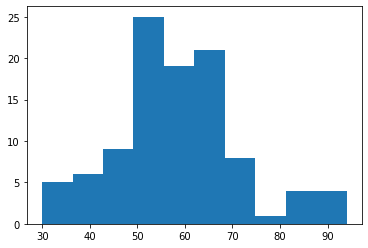

In [87]:
plt.hist(df_individual)

### Wear

In [72]:
df_wear = df_part2.iloc[:,:6].sum(axis=1)/6*100
df_wear

0       66.666667
1       66.666667
2       83.333333
3      100.000000
4       66.666667
          ...    
97     100.000000
98      83.333333
99      83.333333
100     83.333333
101     83.333333
Length: 102, dtype: float64

In [73]:
df_wear.to_frame().describe()

,0
count,102.000000
mean,77.124183
std,12.829072
min,50.000000
25%,66.666667
50%,83.333333
75%,83.333333
max,100.000000


(array([ 7.,  0.,  0., 35.,  0.,  0., 49.,  0.,  0., 11.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 10 Patch objects>)

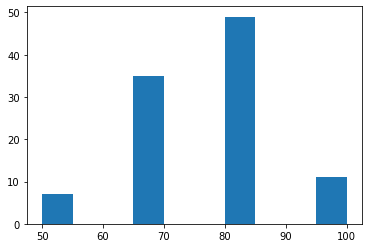

In [86]:
plt.hist(df_wear)

### discard

In [77]:
df_discard = df_part2.iloc[:,6:10].sum(axis=1)/4*100
df_discard

0       50.0
1       25.0
2        0.0
3      100.0
4       75.0
       ...  
97      75.0
98      50.0
99      50.0
100     25.0
101     50.0
Length: 102, dtype: float64

In [78]:
df_discard.to_frame().describe()

,0
count,102.000000
mean,49.509804
std,27.918816
min,0.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


(array([ 7.,  0., 32.,  0.,  0., 30.,  0., 22.,  0., 11.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

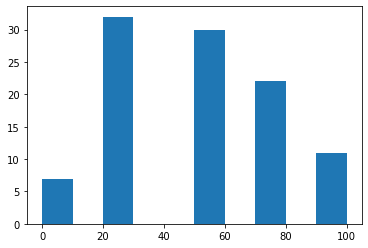

In [85]:
plt.hist(df_discard)

### Keep

In [80]:
df_keep = df_part2.iloc[:,10:14].sum(axis=1)/4*100
df_keep

0       50.0
1        0.0
2       25.0
3      100.0
4       25.0
       ...  
97      25.0
98      25.0
99      25.0
100     25.0
101     25.0
Length: 102, dtype: float64

In [81]:
df_keep.to_frame().describe()

,0
count,102.000000
mean,37.990196
std,27.188923
min,0.000000
25%,25.000000
50%,25.000000
75%,50.000000
max,100.000000


(array([12.,  0., 51.,  0.,  0., 22.,  0.,  8.,  0.,  9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

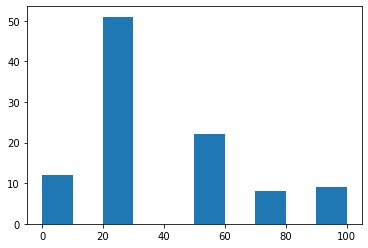

In [84]:
plt.hist(df_keep)

### After Keep

In [90]:
df_after = df_part2.iloc[:,14:18].sum(axis=1)/4*100
df_after

0       25.0
1        0.0
2       25.0
3      100.0
4       25.0
       ...  
97      50.0
98      50.0
99      75.0
100     50.0
101     50.0
Length: 102, dtype: float64

In [91]:
df_after.to_frame().describe()

,0
count,102.000000
mean,43.137255
std,24.665300
min,0.000000
25%,25.000000
50%,50.000000
75%,50.000000
max,100.000000


(array([11.,  0., 28.,  0.,  0., 47.,  0., 10.,  0.,  6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

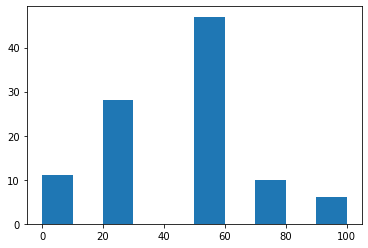

In [92]:
plt.hist(df_after)

### Habit

In [94]:
df_habit = df_part2.iloc[:,18:].sum(axis=1)/7*100
df_habit

0      64.285714
1      71.428571
2      57.142857
3      78.571429
4      64.285714
         ...    
97     78.571429
98     71.428571
99     71.428571
100    71.428571
101    78.571429
Length: 102, dtype: float64

In [95]:
df_habit.to_frame().describe()

,0
count,102.000000
mean,66.386555
std,14.620830
min,14.285714
25%,57.142857
50%,64.285714
75%,76.785714
max,100.000000


(array([ 1.,  0.,  4.,  3., 21., 23., 24., 16.,  4.,  6.]),
 array([ 14.28571429,  22.85714286,  31.42857143,  40.        ,
         48.57142857,  57.14285714,  65.71428571,  74.28571429,
         82.85714286,  91.42857143, 100.        ]),
 <a list of 10 Patch objects>)

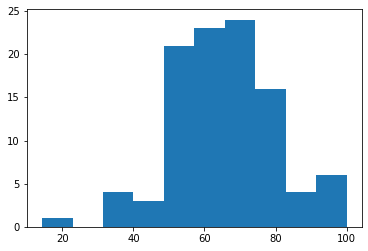

In [96]:
plt.hist(df_habit)

## Sex vs Checklist ? ยังไม่รู้จะใช้มั้ย

In [103]:
df_part3 = df_part2.copy()
df_part3['sex'] = df_part1['q1']
fixed_columns = [df_part3.columns[-1]] + list(df_part3.columns[:-1])
df_part3 = df_part3[fixed_columns]
df_part3

,sex,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,หญิง,0,0,1,1,1,1,0,1,0,...,0,1,0,0.5,1.0,0.5,0.0,1.0,1.0,0.5
1,ชาย,0,0,1,1,1,1,1,0,0,...,0,0,0,1.0,0.5,1.0,0.0,0.5,1.0,1.0
2,ชาย,0,1,1,1,1,1,0,0,0,...,0,1,0,0.5,0.5,1.0,0.0,0.5,0.5,1.0
3,ชาย,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,0.5,0.0,1.0
4,ชาย,0,0,1,1,1,1,1,1,1,...,0,1,0,1.0,0.5,1.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,1,1,1,1,1,1,1,1,1,...,1,1,0,1.0,1.0,1.0,0.5,0.5,0.5,1.0
98,หญิง,0,1,1,1,1,1,1,1,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0
99,หญิง,0,1,1,1,1,1,1,1,0,...,1,1,1,1.0,0.5,1.0,0.5,0.5,0.5,1.0
100,ชาย,0,1,1,1,1,1,1,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0


In [127]:
df_sex_check = df_part3['sex'].copy().to_frame()
df_sex_check['allsteps'] = df_individual
df_sex_check

,sex,allsteps
0,หญิง,54.0
1,ชาย,40.0
2,ชาย,44.0
3,ชาย,94.0
4,ชาย,54.0
...,...,...
97,ชาย,70.0
98,หญิง,60.0
99,หญิง,64.0
100,ชาย,56.0


In [116]:
df_scm = df_sex_check.groupby('sex').mean()
df_scm

,allsteps
sex,
ชาย,56.400000
หญิง,59.538462


In [158]:
df_female = df_sex_check.loc[df_sex_check['sex'] == 'หญิง']
df_female.set_index('sex',inplace = True)

In [159]:
df_male = df_sex_check.loc[df_sex_check['sex'] == 'ชาย']
df_male.set_index('sex',inplace = True)

In [160]:
ttest_ind(df_female, df_male)

Ttest_indResult(statistic=array([1.20244983]), pvalue=array([0.23202879]))

# เทียบเพศกับเช็คลิสต์แต่ละข้อ

In [157]:
for i in range(df_part2.shape[1]):
    try:
        fisherex(df_part3.sex,df_part3.iloc[:,i+1])
    except:
        print (pd.crosstab(df_part3.sex,df_part3.iloc[:,i+1]))

wear1   0  1
sex         
ชาย    42  8
หญิง   44  8
p-value = 1.0
wear2   0   1
sex          
ชาย    21  29
หญิง   25  27
p-value = 0.5570637807469778
wear3  0   1
sex         
ชาย    1  49
หญิง   3  49
p-value = 0.6177617761776174
wear4   1
sex      
ชาย    50
หญิง   52
wear5  0   1
sex         
ชาย    1  49
หญิง   0  52
p-value = 0.4901960784313725
wear6  0   1
sex         
ชาย    0  50
หญิง   3  49
p-value = 0.24286546301689
discard1  0   1
sex            
ชาย       8  42
หญิง      7  45
p-value = 0.7845129383383515
discard2   0   1
sex             
ชาย       27  23
หญิง      25  27
p-value = 0.5599344255648633
discard3   0   1
sex             
ชาย       34  16
หญิง      29  23
p-value = 0.22686160015378032
discard4   0   1
sex             
ชาย       39  11
หญิง      37  15
p-value = 0.4988528434257263
keep1   0   1
sex          
ชาย    10  40
หญิง   14  38
p-value = 0.4869183508810111
keep2   0   1
sex          
ชาย    40  10
หญิง   34  18
p-value = 0.12227931551465622
keep3   0   